In [ ]:
!pip3 install en_core_web_sm
!pip install spacy

# **Importing Libraries**

In [ ]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content
import re
iphone_reviews=[]

**Extracting reviews from SnapDeal website**

In [ ]:
########### Extracting reviews from snapdeal website ##############

iphone_snapdeal=[]
url1 = "https://www.snapdeal.com/product/apple-iphone-5c-16-gb/988871559/reviews?page="
url2 = "&sortBy=RECENCY&vsrc=rcnt#defRevPDP"

for i in range(1,10):
  ip=[]
  base_url = url1+str(i)+url2
  response = requests.get(base_url)
  soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content
  temp = soup.findAll("div",attrs={"class","user-review"})# Extracting the content under specific tags
  for j in range(len(temp)):
    ip.append(temp[j].find("p").text)
  iphone_snapdeal=iphone_snapdeal+ip  # adding the reviews of one page to empty list which in future contains all the reviews

In [ ]:
### Removing repeated reviews
iphone_snapdeal = list(set(iphone_snapdeal))

In [ ]:
# Writing reviews into text file
with open("ip_snapdeal.txt","w",encoding="utf-8") as snp:
    snp.write(str(iphone_snapdeal))

In [ ]:
iphone_snapdeal

['Satisfied and will buy more products from Snapdeal',
 'lovely  fastest super',
 'Recently purchase the phone and was a bit doubtfull while purchasing, but i must tell you this is the most best iphone you can get at this price. It was packed beatifully by the seller and same day dispatch.\nPros\n1. Very Cheap prize\n2. IOS 9 upgrade.\n3. Very smooth\n4. Good build quality\n\nCons\n1.Plastic body\n2. 8GB memory\n\nBut even plastic body looks attractive with premium and good plastuc used. Everyone should go with this phone if you have a budget of 20K',
 'Bought this for my dear wife as a surprise. Got delivered on time!',
 'I am very much happy with my product thanks to SNEPDEAL.',
 'goood.. fast shipping',
 'Lacks the feel.',
 "D phone is good. IOS is d best OS.... Safe also. D phone looks great though it consists plastic body. Metal body looks good bt dt nt means plastic body looks cheap plastic may also b nice in looks. Its camera is superb. Battery also. Dere is only one problem nd 

# **Import Libraries**

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy
from spacy.lang.en.examples import sentences
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.tokenize import word_tokenize
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# **Load the dataset**

In [ ]:
ip_snapd=pd.read_csv('ip_snapdeal.txt',encoding='Latin-1')
ip_snapd

,['Satisfied and will buy more products from Snapdeal','lovely fastest super','Recently purchase the phone and was a bit doubtfull while purchasing,but i must tell you this is the most best iphone you can get at this price. It was packed beatifully by the seller and same day dispatch.\nPros\n1. Very Cheap prize\n2. IOS 9 upgrade.\n3. Very smooth\n4. Good build quality\n\nCons\n1.Plastic body\n2. 8GB memory\n\nBut even plastic body looks attractive with premium and good plastuc used. Everyone should go with this phone if you have a budget of 20K','Bought this for my dear wife as a surprise. Got delivered on time!','I am very much happy with my product thanks to SNEPDEAL.','goood.. fast shipping','Lacks the feel.',"""D phone is good. IOS is d best OS.... Safe also. D phone looks great though it consists plastic body. Metal body looks good bt dt nt means plastic body looks cheap plastic may also b nice in looks. Its camera is superb. Battery also. Dere is only one problem nd dat is space... Bt I can't say dis is d phone's problem at all. I hv chosen d 8gb phone so it's my flaw. But in 1 word i just can say it is d best phone in dis price. Thumbs up APPLE""",'Mobile was got no hang smooth touch performing well',...,'got this at a great discount,the phone is worth it. my wife wanted to try an iphone and she is loving it now',"""The OS will take around 5GB","leaving only 3 GB for your files. Unless you're not a heavy files user.""","""Totaly satisfy with the product... It is a brand new 100% genuine iphone. And got it within 24 hours of ordering.... Packing was superb with 'PRIORITY' mark on the box.... Thanx to snapdeal !""","""Ordered for my sister's rakhi gift 1 week prior . however it came faster than that..\nand thanks for getting offer from recharge site.\n\ngreat job team.""",'Good buy at an affordable price during the sale.','Very good phone in this price category with manufacturers warranty','I got my iPhone 5c white colour in good condition and best rate \nsnapdeal rate is always lowest then other sites and store also','Excellent Product & Good Service by Snap Deal.']


# **Text processing**

In [ ]:
ip_snapd=' '.join(ip_snapd)
ip_snapd

'[\'Satisfied and will buy more products from Snapdeal\'  \'lovely  fastest super\'  \'Recently purchase the phone and was a bit doubtfull while purchasing  but i must tell you this is the most best iphone you can get at this price. It was packed beatifully by the seller and same day dispatch.\\nPros\\n1. Very Cheap prize\\n2. IOS 9 upgrade.\\n3. Very smooth\\n4. Good build quality\\n\\nCons\\n1.Plastic body\\n2. 8GB memory\\n\\nBut even plastic body looks attractive with premium and good plastuc used. Everyone should go with this phone if you have a budget of 20K\'  \'Bought this for my dear wife as a surprise. Got delivered on time!\'  \'I am very much happy with my product thanks to SNEPDEAL.\'  \'goood.. fast shipping\'  \'Lacks the feel.\'  "D phone is good. IOS is d best OS.... Safe also. D phone looks great though it consists plastic body. Metal body looks good bt dt nt means plastic body looks cheap plastic may also b nice in looks. Its camera is superb. Battery also. Dere is o

In [ ]:
# Remove Punctuations
no_punc_text=ip_snapd.translate(str.maketrans('','',string.punctuation))
no_punc_text

'Satisfied and will buy more products from Snapdeal  lovely  fastest super  Recently purchase the phone and was a bit doubtfull while purchasing  but i must tell you this is the most best iphone you can get at this price It was packed beatifully by the seller and same day dispatchnProsn1 Very Cheap prizen2 IOS 9 upgraden3 Very smoothn4 Good build qualitynnConsn1Plastic bodyn2 8GB memorynnBut even plastic body looks attractive with premium and good plastuc used Everyone should go with this phone if you have a budget of 20K  Bought this for my dear wife as a surprise Got delivered on time  I am very much happy with my product thanks to SNEPDEAL  goood fast shipping  Lacks the feel  D phone is good IOS is d best OS Safe also D phone looks great though it consists plastic body Metal body looks good bt dt nt means plastic body looks cheap plastic may also b nice in looks Its camera is superb Battery also Dere is only one problem nd dat is space Bt I cant say dis is d phones problem at all I

In [ ]:
# remove https or url within text
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'Satisfied and will buy more products from Snapdeal  lovely  fastest super  Recently purchase the phone and was a bit doubtfull while purchasing  but i must tell you this is the most best iphone you can get at this price It was packed beatifully by the seller and same day dispatchnProsn1 Very Cheap prizen2 IOS 9 upgraden3 Very smoothn4 Good build qualitynnConsn1Plastic bodyn2 8GB memorynnBut even plastic body looks attractive with premium and good plastuc used Everyone should go with this phone if you have a budget of 20K  Bought this for my dear wife as a surprise Got delivered on time  I am very much happy with my product thanks to SNEPDEAL  goood fast shipping  Lacks the feel  D phone is good IOS is d best OS Safe also D phone looks great though it consists plastic body Metal body looks good bt dt nt means plastic body looks cheap plastic may also b nice in looks Its camera is superb Battery also Dere is only one problem nd dat is space Bt I cant say dis is d phones problem at all I

In [ ]:
nltk.download('punkt') #downloading tokenizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
text_tokens=word_tokenize(no_url_text)
print(text_tokens)

['Satisfied', 'and', 'will', 'buy', 'more', 'products', 'from', 'Snapdeal', 'lovely', 'fastest', 'super', 'Recently', 'purchase', 'the', 'phone', 'and', 'was', 'a', 'bit', 'doubtfull', 'while', 'purchasing', 'but', 'i', 'must', 'tell', 'you', 'this', 'is', 'the', 'most', 'best', 'iphone', 'you', 'can', 'get', 'at', 'this', 'price', 'It', 'was', 'packed', 'beatifully', 'by', 'the', 'seller', 'and', 'same', 'day', 'dispatchnProsn1', 'Very', 'Cheap', 'prizen2', 'IOS', '9', 'upgraden3', 'Very', 'smoothn4', 'Good', 'build', 'qualitynnConsn1Plastic', 'bodyn2', '8GB', 'memorynnBut', 'even', 'plastic', 'body', 'looks', 'attractive', 'with', 'premium', 'and', 'good', 'plastuc', 'used', 'Everyone', 'should', 'go', 'with', 'this', 'phone', 'if', 'you', 'have', 'a', 'budget', 'of', '20K', 'Bought', 'this', 'for', 'my', 'dear', 'wife', 'as', 'a', 'surprise', 'Got', 'delivered', 'on', 'time', 'I', 'am', 'very', 'much', 'happy', 'with', 'my', 'product', 'thanks', 'to', 'SNEPDEAL', 'goood', 'fast', 's

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Tokens count
len(text_tokens)

1573

In [ ]:
# Remove Stopwords
my_stop_words=stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['Satisfied', 'buy', 'products', 'Snapdeal', 'lovely', 'fastest', 'super', 'Recently', 'purchase', 'phone', 'bit', 'doubtfull', 'purchasing', 'must', 'tell', 'best', 'iphone', 'get', 'price', 'It', 'packed', 'beatifully', 'seller', 'day', 'dispatchnProsn1', 'Very', 'Cheap', 'prizen2', 'IOS', '9', 'upgraden3', 'Very', 'smoothn4', 'Good', 'build', 'qualitynnConsn1Plastic', 'bodyn2', '8GB', 'memorynnBut', 'even', 'plastic', 'body', 'looks', 'attractive', 'premium', 'good', 'plastuc', 'used', 'Everyone', 'go', 'phone', 'budget', '20K', 'Bought', 'dear', 'wife', 'surprise', 'Got', 'delivered', 'time', 'much', 'happy', 'product', 'thanks', 'SNEPDEAL', 'goood', 'fast', 'shipping', 'Lacks', 'feel', 'D', 'phone', 'good', 'IOS', 'best', 'OS', 'Safe', 'also', 'D', 'phone', 'looks', 'great', 'though', 'consists', 'plastic', 'body', 'Metal', 'body', 'looks', 'good', 'bt', 'dt', 'nt', 'means', 'plastic', 'body', 'looks', 'cheap', 'plastic', 'may', 'also', 'b', 'nice', 'looks', 'Its', 'camera', 'supe

In [ ]:
# Normalize the data
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['also', 'b', 'nice', 'looks', 'its', 'camera', 'superb', 'battery', 'also', 'dere', 'one', 'problem', 'nd', 'dat', 'space', 'bt', 'cant', 'say', 'dis', 'phones', 'problem', 'hv', 'chosen', '8gb', 'phone', 'flaw', 'but', '1', 'word', 'say', 'best', 'phone', 'dis', 'price', 'thumbs', 'apple', 'mobile', 'got', 'hang', 'smooth', 'touch', 'performing', 'well', 'genuine', 'product', 'quality', 'great', 'overall', 'perfect', 'really', 'happy', 'product', 'im', 'also', 'happy', 'snapdeal', 'service', 'marvallous', 'phoneever', 'usedyou', 'must', 'buy', 'good', 'price', 'great', 'seller', 'genuine', 'product', 'fast', 'shipping', 'recommended', 'good', 'productthanks', 'snapdeal', 'sellers', 'delivered', 'original', 'phone', '0', 'good', 'phone', 'mobile', 'oparating', 'essy', 'inter', 'net', 'fast', 'working', 'beautiful', 'product', 'original', 'apple', 'product', 'delivery', '2nd', 'daynand', 'iphone', 'iphone', 'they', 'sold']


In [ ]:
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['also', 'b', 'nice', 'look', 'it', 'camera', 'superb', 'batteri', 'also', 'dere', 'one', 'problem', 'nd', 'dat', 'space', 'bt', 'cant', 'say', 'di', 'phone', 'problem', 'hv', 'chosen', '8gb', 'phone', 'flaw', 'but', '1', 'word', 'say', 'best', 'phone', 'di', 'price', 'thumb', 'appl', 'mobil', 'got', 'hang', 'smooth', 'touch', 'perform', 'well', 'genuin', 'product', 'qualiti', 'great', 'overal', 'perfect', 'realli', 'happi', 'product', 'im', 'also', 'happi', 'snapdeal', 'servic', 'marval', 'phoneev', 'usedy', 'must', 'buy', 'good', 'price', 'great', 'seller', 'genuin', 'product', 'fast', 'ship', 'recommend', 'good', 'productthank', 'snapdeal', 'seller', 'deliv', 'origin', 'phone', '0', 'good', 'phone', 'mobil', 'opar', 'essi', 'inter', 'net', 'fast', 'work', 'beauti', 'product', 'origin', 'appl', 'product', 'deliveri', '2nd', 'daynand', 'iphon', 'iphon', 'they', 'sold']


In [ ]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

satisfied buy products snapdeal lovely fastest super recently purchase phone bit doubtfull purchasing must tell best iphone get price it packed beatifully seller day dispatchnprosn1 very cheap prizen2 ios 9 upgraden3 very smoothn4 good build qualitynnconsn1plastic bodyn2 8gb memorynnbut even plastic body looks attractive premium good plastuc used everyone go phone budget 20k bought dear wife surprise got delivered time much happy product thanks snepdeal goood fast shipping lacks feel d phone good ios best os safe also d phone looks great though consists plastic body metal body looks good bt dt nt means plastic body looks cheap plastic may also b nice looks its camera superb battery also dere one problem nd dat space bt cant say dis phones problem hv chosen 8gb phone flaw but 1 word say best phone dis price thumbs apple mobile got hang smooth touch performing well genuine product quality great overall perfect really happy product im also happy snapdeal service marvallous phoneever usedy

In [ ]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['satisfied', 'buy', 'product', 'snapdeal', 'lovely', 'fast', 'super', 'recently', 'purchase', 'phone', 'bit', 'doubtfull', 'purchasing', 'must', 'tell', 'good', 'iphone', 'get', 'price', 'it', 'pack', 'beatifully', 'seller', 'day', 'dispatchnprosn1', 'very', 'cheap', 'prizen2', 'io', '9', 'upgraden3', 'very', 'smoothn4', 'good', 'build', 'qualitynnconsn1plastic', 'bodyn2', '8', 'gb', 'memorynnbut', 'even', 'plastic', 'body', 'look', 'attractive', 'premium', 'good', 'plastuc', 'use', 'everyone', 'go', 'phone', 'budget', '20k', 'buy', 'dear', 'wife', 'surprise', 'got', 'deliver', 'time', 'much', 'happy', 'product', 'thank', 'snepdeal', 'goood', 'fast', 'shipping', 'lack', 'feel', 'd', 'phone', 'good', 'io', 'good', 'os', 'safe', 'also', 'd', 'phone', 'look', 'great', 'though', 'consist', 'plastic', 'body', 'metal', 'body', 'look', 'good', 'bt', 'dt', 'not', 'mean', 'plastic', 'body', 'look', 'cheap', 'plastic', 'may', 'also', 'b', 'nice', 'look', 'its', 'camera', 'superb', 'battery', 'a

In [ ]:
clean_comments=' '.join(lemmas)
clean_comments

'satisfied buy product snapdeal lovely fast super recently purchase phone bit doubtfull purchasing must tell good iphone get price it pack beatifully seller day dispatchnprosn1 very cheap prizen2 io 9 upgraden3 very smoothn4 good build qualitynnconsn1plastic bodyn2 8 gb memorynnbut even plastic body look attractive premium good plastuc use everyone go phone budget 20k buy dear wife surprise got deliver time much happy product thank snepdeal goood fast shipping lack feel d phone good io good os safe also d phone look great though consist plastic body metal body look good bt dt not mean plastic body look cheap plastic may also b nice look its camera superb battery also dere one problem nd dat space bt can not say dis phone problem hv choose 8 gb phone flaw but 1 word say good phone dis price thumb apple mobile got hang smooth touch perform well genuine product quality great overall perfect really happy product I m also happy snapdeal service marvallous phoneever usedyou must buy good pri

# **Feature Extaction**

In [ ]:
cv=CountVectorizer()
clean_commentscv=cv.fit_transform(lemmas)
print(cv.vocabulary_)

{'satisfied': 301, 'buy': 54, 'product': 264, 'snapdeal': 333, 'lovely': 194, 'fast': 124, 'super': 346, 'recently': 288, 'purchase': 274, 'phone': 245, 'bit': 43, 'doubtfull': 106, 'purchasing': 275, 'must': 212, 'tell': 353, 'good': 143, 'iphone': 173, 'get': 140, 'price': 256, 'it': 177, 'pack': 236, 'beatifully': 40, 'seller': 310, 'day': 89, 'dispatchnprosn1': 101, 'very': 391, 'cheap': 62, 'prizen2': 260, 'io': 170, 'upgraden3': 384, 'smoothn4': 331, 'build': 51, 'qualitynnconsn1plastic': 278, 'bodyn2': 46, 'gb': 138, 'memorynnbut': 204, 'even': 115, 'plastic': 250, 'body': 45, 'look': 192, 'attractive': 31, 'premium': 253, 'plastuc': 251, 'use': 386, 'everyone': 117, 'go': 142, 'budget': 50, '20k': 4, 'dear': 92, 'wife': 398, 'surprise': 349, 'got': 146, 'deliver': 95, 'time': 368, 'much': 210, 'happy': 152, 'thank': 354, 'snepdeal': 335, 'goood': 145, 'shipping': 317, 'lack': 182, 'feel': 126, 'os': 234, 'safe': 297, 'also': 21, 'great': 148, 'though': 364, 'consist': 75, 'meta

In [ ]:
print(clean_commentscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(clean_commentscv.toarray().shape)

(1028, 411)


# **2. CountVectorizer with N-grams (Bigrams & Trigrams)**

In [ ]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [ ]:
print(bow_matrix_ngram.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(cv_ngram_range.get_feature_names_out())

['100' '5c' 'also' 'amazing' 'and' 'apple' 'awesome' 'awsme' 'battery'
 'body' 'box' 'brand' 'bt' 'budget' 'but' 'buy' 'camera' 'cheap'
 'condition' 'day' 'deal' 'deliver' 'delivery' 'do' 'even' 'excellent'
 'experience' 'fast' 'file' 'gb' 'genuine' 'get' 'go' 'good' 'got' 'great'
 'hang' 'happy' 'have' 'interest' 'io' 'ios' 'iphone' 'issue' 'it' 'its'
 'late' 'like' 'look' 'low' 'memory' 'mobile' 'need' 'new' 'nice' 'not'
 'one' 'order' 'original' 'pack' 'perfect' 'phone' 'plastic' 'price'
 'problem' 'product' 'quality' 'really' 'receive' 'recommend'
 'satisfactory' 'satisfied' 'scheme' 'seller' 'service' 'shipping' 'site'
 'snap' 'snapdeal' 'so' 'space' 'superb' 'take' 'thank' 'the' 'thing'
 'this' 'though' 'till' 'time' 'true' 'update' 'use' 'very' 'want' 'well'
 'within' 'worth' 'would' 'you']


# **3. TF-IDF Vectorizer**

In [ ]:
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [ ]:
print(tfidfv_ngram_max_features.get_feature_names_out())
print(tfidf_matix_ngram.toarray())

['10' '100' '1000rs' '2030' '20k' '24' '2nd' '5c' '5cnnsnapdeal' '6s'
 '9nncons' 'absolutly' 'accessory' 'account' 'action' 'ad' 'adorable'
 'affordable' 'after' 'almost' 'already' 'also' 'always' 'amazing' 'and'
 'andriodblackberrywindow' 'android' 'app' 'apple' 'around' 'as'
 'attractive' 'available' 'awesome' 'awesum' 'awsme' 'awwsum' 'back'
 'battery' 'be' 'beatifully' 'beautiful' 'believe' 'bit' 'bluetooth'
 'body' 'bodyn2' 'box' 'brand' 'bt' 'budget' 'build' 'business' 'but'
 'buy' 'camera' 'can' 'capacity' 'care' 'category' 'cell' 'charge' 'cheap'
 'choice' 'choose' 'class' 'close' 'colour' 'come' 'commit' 'compare'
 'competitive' 'con' 'condition' 'conditionnno' 'consist' 'contact' 'cool'
 'costly' 'coupon' 'courier' 'cr' 'crazy' 'credit' 'crisp' 'customer'
 'damage' 'dat' 'datum' 'day' 'daynand' 'deal' 'dear' 'decide'
 'defination' 'deliver' 'delivery' 'delivry' 'dere' 'dis' 'discount'
 'dispatchnprosn1' 'display' 'do' 'doubt' 'doubted' 'doubtfull' 'dream'
 'dt' 'due' 'earn' '

# **Generate Word Cloud**

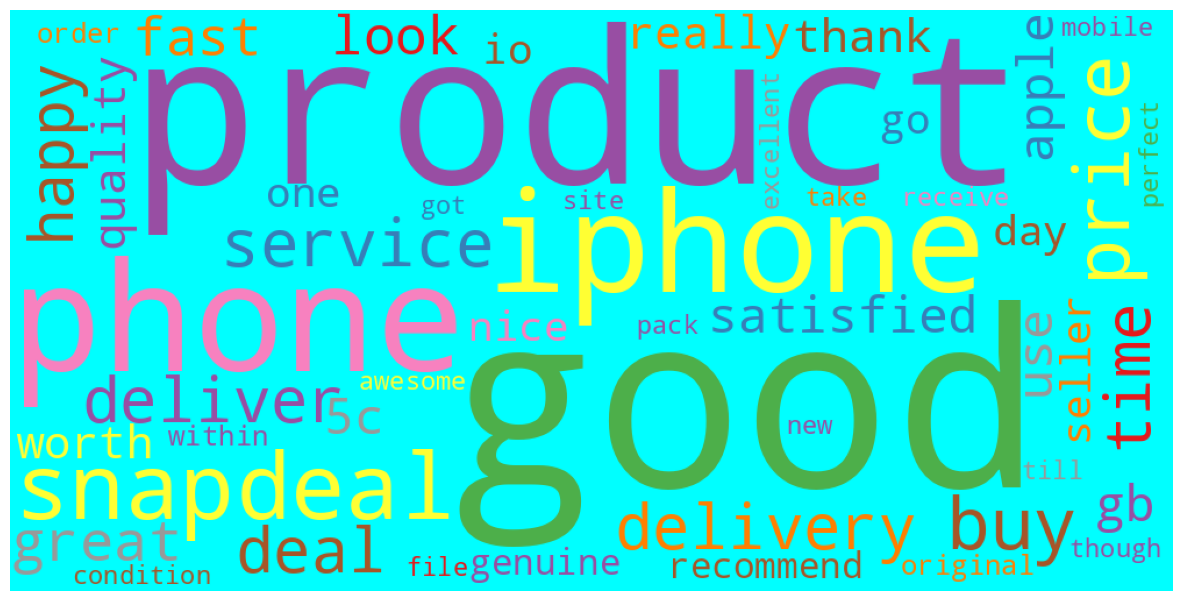

In [ ]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate Word Cloud

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=1000,height=500,background_color='aqua',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_comments)
plot_cloud(wordcloud)

# **Named Entity Recognition (NER)**

In [ ]:
#parts of Speech tagging
nlp = spacy.load('en_core_web_sm')
one_block = clean_comments
doc_block = nlp(one_block)
#code to understand NER
#style = 'ent' -> when you want your entities in colored
spacy.displacy.render(doc_block, style = 'ent', jupyter = True)

In [ ]:
#each token we want pos tagging
for token in doc_block[0:20]:
  print(token, token.pos_)

satisfied ADJ
buy NOUN
product NOUN
snapdeal ADJ
lovely ADJ
fast ADJ
super ADJ
recently ADV
purchase NOUN
phone NOUN
bit NOUN
doubtfull ADJ
purchasing NOUN
must AUX
tell VERB
good ADJ
iphone NOUN
get VERB
price NOUN
it PRON


In [ ]:
# Filtering the nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in('NOUN', 'VERB')]
print(nouns_verbs[50:150])

['look', 'plastic', 'look', 'camera', 'superb', 'battery', 'dere', 'problem', 'space', 'say', 'phone', 'problem', 'choose', 'gb', 'phone', 'flaw', 'word', 'say', 'phone', 'dis', 'price', 'thumb', 'apple', 'mobile', 'hang', 'touch', 'perform', 'product', 'quality', 'product', 'm', 'service', 'phoneever', 'buy', 'price', 'seller', 'product', 'shipping', 'recommend', 'productthank', 'seller', 'deliver', 'phone', 'phone', 'mobile', 'oparating', 'work', 'product', 'apple', 'product', 'delivery', '2nd', 'daynand', 'iphone', 'iphone', 'sell', 'iphone', 'interest', 'scheme', 'phone', 'seller', 'price', 'interest', 'part', 'credit', 'account', 'snapdeal', 'take', 'action', 'issue', 'buy', 'scheme', 'service', 'quality', 'level', 'interaction', 'worth', 'buy', 'deal', 'price', 'servicenthank', 'sd', 'phone', 'price', 'buy', 'iphone', 'product', 'wor', 'price', 'shop', 'side', 'phone', 'class', 'service', 'delivry', 'time', 'product', 'recievd', 'condition', 'think']


In [ ]:
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
#how many times that word is coming
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x:x[1], reverse = True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10] #top 10 results

,word,count
0,product,40
1,phone,28
2,iphone,26
3,price,17
4,buy,15
5,service,12
6,deliver,11
7,time,11
8,delivery,11
9,deal,10


<Axes: title={'center': 'Top verbs and nouns'}, xlabel='word'>

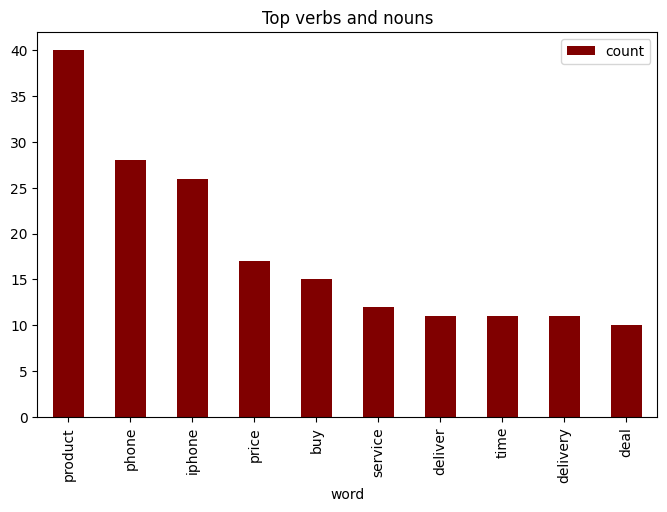

In [ ]:
#barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(8,5), title='Top verbs and nouns', color='maroon')

# **Emotion Mining**

In [ ]:
sentences = tokenize.sent_tokenize(' '.join(iphone_snapdeal))
sentences[0:10]

['Satisfied and will buy more products from Snapdeal lovely  fastest super Recently purchase the phone and was a bit doubtfull while purchasing, but i must tell you this is the most best iphone you can get at this price.',
 'It was packed beatifully by the seller and same day dispatch.',
 'Pros\n1.',
 'Very Cheap prize\n2.',
 'IOS 9 upgrade.',
 '3.',
 'Very smooth\n4.',
 'Good build quality\n\nCons\n1.Plastic body\n2.',
 '8GB memory\n\nBut even plastic body looks attractive with premium and good plastuc used.',
 'Everyone should go with this phone if you have a budget of 20K Bought this for my dear wife as a surprise.']

In [ ]:
len(iphone_snapdeal)

87

In [ ]:
#creating a dataframe of sentences
sent_df = pd.DataFrame(sentences, columns=['Sentence'])
sent_df
#87 paras we are converting into 127 sentences

,Sentence
0,Satisfied and will buy more products from Snap...
1,It was packed beatifully by the seller and sam...
2,Pros\n1.
3,Very Cheap prize\n2.
4,IOS 9 upgrade.
...,...
122,Ordered for my sister's rakhi gift 1 week prior .
123,however it came faster than that..\nand thanks...
124,great job team.
125,Good buy at an affordable price during the sale.


In [44]:
from google.colab import files
uploaded=files.upload()

Saving Afinn.csv to Afinn.csv


In [45]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')

In [46]:
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [47]:
#calculating affinity score for each sentence by checking emotional words for each sentence
#and whatever the score associated with those emotions, then we will aggregate
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [48]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [49]:
#checking if it works
calculate_sentiment(text = 'awful')

-3

In [51]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['Sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      11
1       0
2       0
3       0
4       0
       ..
122     2
123     2
124     3
125     3
126     9
Name: sentiment_value, Length: 127, dtype: int64

In [53]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['Sentence'].str.split().apply(len)
sent_df['word_count']

0      39
1      11
2       2
3       4
4       3
       ..
122    10
123    14
124     3
125     9
126    42
Name: word_count, Length: 127, dtype: int64

In [54]:
sent_df.sort_values(by='sentiment_value')

,Sentence,sentiment_value,word_count
83,But those all reviews are fake and just to dam...,-6,14
34,Dont buy on fraudulent schemes.,-4,5
20,Dere is only one problem nd dat is space... Bt...,-4,20
64,Only problem is you need to pay for everything.,-3,9
114,no lagging till today\nsuitable for your busin...,-3,9
...,...,...,...
69,Recommending to everyone got delivered on time...,13,38
97,Its an awesome phone Pros : Picture quality is...,16,42
36,Worth buying from snap deal due to its competi...,17,88
59,"Superb model , snapdeal delivered as promised ...",18,51


In [56]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    127.00000
mean       2.84252
std        4.33228
min       -6.00000
25%        0.00000
50%        2.00000
75%        4.00000
max       24.00000
Name: sentiment_value, dtype: float64

In [58]:
#checking all the sentences where sent score <=0
sent_df[sent_df['sentiment_value']<=0]

,Sentence,sentiment_value,word_count
1,It was packed beatifully by the seller and sam...,0,11
2,Pros\n1.,0,2
3,Very Cheap prize\n2.,0,4
4,IOS 9 upgrade.,0,3
5,3.,0,1
6,Very smooth\n4.,0,3
10,Got delivered on time!,0,4
12,goood.. fast shipping Lacks the feel.,-2,6
19,Battery also.,0,2
20,Dere is only one problem nd dat is space... Bt...,-4,20


In [60]:
#we are getting those sentences which are having score <-2
#after that we are applying tolist means we aregetting these sentences together
sent_df[sent_df['sentiment_value']<-2].head()['Sentence'].tolist()[0]

"Dere is only one problem nd dat is space... Bt I can't say dis is d phone's problem at all."

In [61]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,Sentence,sentiment_value,word_count
0,Satisfied and will buy more products from Snap...,11,39
7,Good build quality\n\nCons\n1.Plastic body\n2.,3,7
8,8GB memory\n\nBut even plastic body looks attr...,3,14
9,Everyone should go with this phone if you have...,2,22
11,I am very much happy with my product thanks to...,5,11
...,...,...,...
122,Ordered for my sister's rakhi gift 1 week prior .,2,10
123,however it came faster than that..\nand thanks...,2,14
124,great job team.,3,3
125,Good buy at an affordable price during the sale.,3,9


In [64]:
sent_df['index']=range(0, len(sent_df)) #adding index column
sent_df

,Sentence,sentiment_value,word_count,index
0,Satisfied and will buy more products from Snap...,11,39,0
1,It was packed beatifully by the seller and sam...,0,11,1
2,Pros\n1.,0,2,2
3,Very Cheap prize\n2.,0,4,3
4,IOS 9 upgrade.,0,3,4
...,...,...,...,...
122,Ordered for my sister's rakhi gift 1 week prior .,2,10,122
123,however it came faster than that..\nand thanks...,2,14,123
124,great job team.,3,3,124
125,Good buy at an affordable price during the sale.,3,9,125


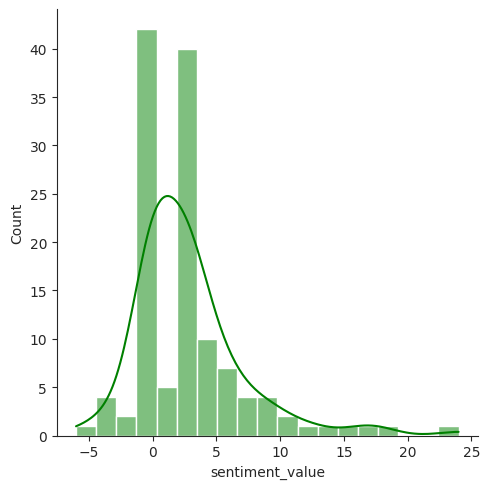

In [68]:
sns.set_style(style='ticks')

sns.displot(data=sent_df, x ='sentiment_value', kde=True, color='green')
plt.show()

<Axes: xlabel='index', ylabel='sentiment_value'>

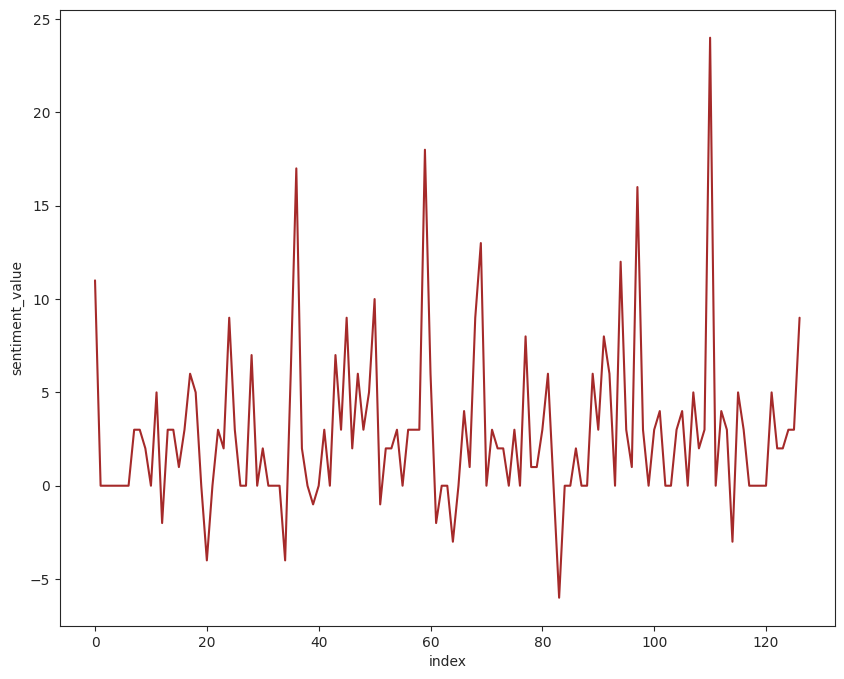

In [69]:
#lineplot of sentiment values
plt.figure(figsize=(10,8))
sns.lineplot(y='sentiment_value', x='index', data=sent_df, color='brown')

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

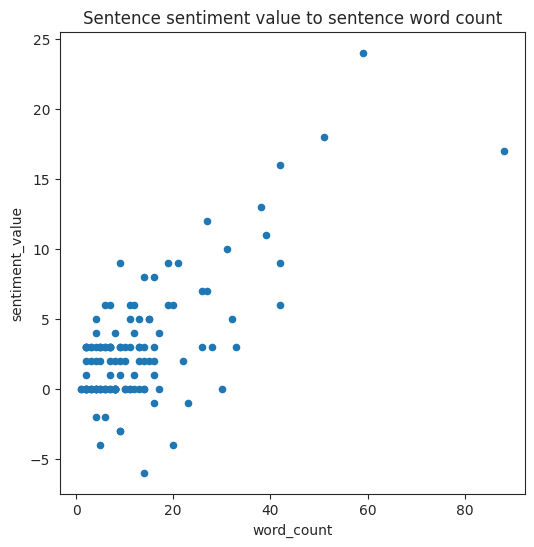

In [71]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(6,6), title='Sentence sentiment value to sentence word count')